# Implementação de rede neural com back-propagation para problema simples de regressão

Baseado no tutorial ["How to Code a Neural Network with Backpropagation In Python (from scratch)"](https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/).


In [1]:
from random import random

def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

def print_net(net):
    for i, layer in enumerate(net):
        print("Camada {}".format(i+1) if i==0 else "Camada de saída")
        for j, neuron in enumerate(layer):
            output = ", Saída: {}".format(neuron["output"]) if "output" in neuron else ""
            delta = ", Delta (erro): {}".format(neuron["delta"]) if "delta" in neuron else ""
            print("Neurônio {}, Pesos + Bias: ".format(j), neuron["weights"], output, delta)

net = initialize_network(1, 5, 1)
print_net(net)

Camada 1
Neurônio 0, Pesos + Bias:  [0.7871709311715823, 0.7011009135573232]  
Neurônio 1, Pesos + Bias:  [0.7375136793764627, 0.4107522821922248]  
Neurônio 2, Pesos + Bias:  [0.015026800965265874, 0.5768386807707145]  
Neurônio 3, Pesos + Bias:  [0.42268758550719987, 0.4384901043907602]  
Neurônio 4, Pesos + Bias:  [0.4343199100159093, 0.5367333418696562]  
Camada de saída
Neurônio 0, Pesos + Bias:  [0.07950847965521857, 0.4857740208892606, 0.15456692979404407, 0.28781259177234453, 0.678827360146321, 0.07546162713296689]  


In [2]:
import numpy as np

def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

weights = np.array([2, 4]) # O último é o bias
input = np.array([2])
print("Somatório neurônio: ", activate(weights, input))

Somatório neurônio:  8


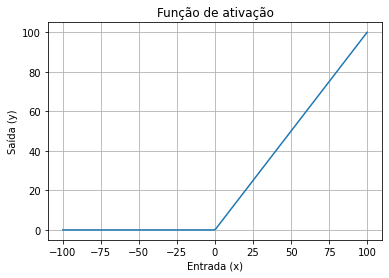

In [3]:
import matplotlib.pyplot as plt

def transfer(activation):
	#return 1.0 / (1.0 + np.exp(-activation)) #tanh
	return np.where(activation<0, 0, activation)

plt.figure()
x_transfer = np.linspace(-100,100,200)
y_transfer = transfer(x_transfer)
plt.title("Função de ativação")
plt.xlabel("Entrada (x)")
plt.ylabel("Saída (y)")
plt.grid()
plt.plot(x_transfer,y_transfer)
plt.show()

In [4]:
#Remover função de ativação da ultima camada se formmos fazer regressão
def forward_propagate(network, row):
	inputs = row
	for i, layer in enumerate(network):
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation) if (i+1) != len(network) else activation
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs
	
output = forward_propagate(net, input)
print ("Saída da rede neural:", output)

Saída da rede neural: [2.589765204248067]


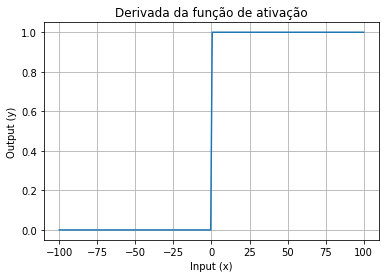

In [5]:
def transfer_derivative(output):
	# return output * (1.0 - output) # Tanh
	return np.where(output<0, 0, 1)

plt.figure()
x_transfer_derivative = np.linspace(-100,100,200)
y_transfer_derivative = transfer_derivative(x_transfer_derivative)
plt.title("Derivada da função de ativação")
plt.xlabel("Input (x)")
plt.ylabel("Output (y)")
plt.grid()
plt.plot(x_transfer_derivative,y_transfer_derivative)
plt.show()

In [6]:
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output']) if (i+1) != len(network) else errors[j] * neuron["output"]

print(input)
expected = [5]
backward_propagate_error(net, expected)
print_net(net)

[2]
Camada 1
Neurônio 0, Pesos + Bias:  [0.7871709311715823, 0.7011009135573232] , Saída: 2.275442775900488 , Delta (erro): 0.49628733506227
Neurônio 1, Pesos + Bias:  [0.7375136793764627, 0.4107522821922248] , Saída: 1.8857796409451502 , Delta (erro): 3.0321733645901885
Neurônio 2, Pesos + Bias:  [0.015026800965265874, 0.5768386807707145] , Saída: 0.6068922827012463 , Delta (erro): 0.9647978430588473
Neurônio 3, Pesos + Bias:  [0.42268758550719987, 0.4384901043907602] , Saída: 1.28386527540516 , Delta (erro): 1.796509564608266
Neurônio 4, Pesos + Bias:  [0.4343199100159093, 0.5367333418696562] , Saída: 1.4053731619014749 , Delta (erro): 4.237201151314699
Camada de saída
Neurônio 0, Pesos + Bias:  [0.07950847965521857, 0.4857740208892606, 0.15456692979404407, 0.28781259177234453, 0.678827360146321, 0.07546162713296689] , Saída: 2.589765204248067 , Delta (erro): 6.241942208106303


In [7]:
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[-1:]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

learning_rate = 0.001
update_weights(net, input, learning_rate)
print_net(net)

Camada 1
Neurônio 0, Pesos + Bias:  [0.7881635058417069, 0.7015972008923854] , Saída: 2.275442775900488 , Delta (erro): 0.49628733506227
Neurônio 1, Pesos + Bias:  [0.743578026105643, 0.413784455556815] , Saída: 1.8857796409451502 , Delta (erro): 3.0321733645901885
Neurônio 2, Pesos + Bias:  [0.016956396651383567, 0.5778034786137733] , Saída: 0.6068922827012463 , Delta (erro): 0.9647978430588473
Neurônio 3, Pesos + Bias:  [0.4262806046364164, 0.44028661395536844] , Saída: 1.28386527540516 , Delta (erro): 1.796509564608266
Neurônio 4, Pesos + Bias:  [0.4427943123185387, 0.5409705430209708] , Saída: 1.4053731619014749 , Delta (erro): 4.237201151314699
Camada de saída
Neurônio 0, Pesos + Bias:  [0.09371166196024239, 0.49754494842526364, 0.15835511634921096, 0.295826404624418, 0.6875996182037336, 0.08170356934107319] , Saída: 2.589765204248067 , Delta (erro): 6.241942208106303


In [8]:
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs

print("Entrada: ", input, ", Saída: ",predict(net, input))

Entrada:  [2] , Saída:  [2.7012034437288657]


## Preparação da base de dados

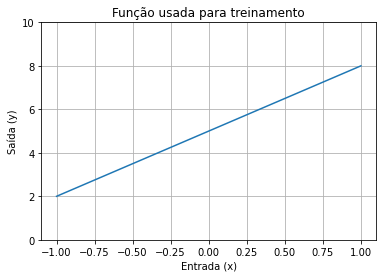

In [9]:
# Função que vamos tentar aproximar
n = 10 # Número de registros na base de dados
x = np.linspace(-1,1,n)
y = 5+x*3

plt.figure()
plt.title("Função usada para treinamento")
plt.xlabel("Entrada (x)")
plt.ylabel("Saída (y)")
plt.ylim([0,10])
plt.grid()
plt.plot(x,y)
plt.show()

In [10]:
# Divisão base de dados para treino e teste
from sklearn.model_selection import train_test_split

test_size = 0.1
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1,1), y, test_size=test_size)
print("Dimensão entradas para treino = {}\nDimensão saídas para treino = {}\n\nDimensão entradas para teste = {}\nDimensão saídas para teste = {}\n".format(x_train.shape[0], y_train.shape[0], x_test.shape[0], y_test.shape[0]))

Dimensão entradas para treino = 9
Dimensão saídas para treino = 9

Dimensão entradas para teste = 1
Dimensão saídas para teste = 1



In [11]:
# Implementando validação cruzada
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=1)
for train, test in rkf.split(x_train):
	print("Índices treino: %s, Índices validação: %s" % (train, test))

Índices treino: [0 1 2 4 5 6 7], Índices validação: [3 8]
Índices treino: [0 1 2 3 5 6 8], Índices validação: [4 7]
Índices treino: [0 1 2 3 4 7 8], Índices validação: [5 6]
Índices treino: [1 3 4 5 6 7 8], Índices validação: [0 2]
Índices treino: [0 2 3 4 5 6 7 8], Índices validação: [1]


## Treinamento da rede

Rede neural antes do treinamento:
Camada 1
Neurônio 0, Pesos + Bias:  [0.5094331306772055, 0.5422615864335947]  
Neurônio 1, Pesos + Bias:  [0.1675275008229713, 0.7052596072679638]  
Neurônio 2, Pesos + Bias:  [0.41048235795827226, 0.41396026515263773]  
Neurônio 3, Pesos + Bias:  [0.8960072729958211, 0.3391563243182967]  
Neurônio 4, Pesos + Bias:  [0.8524522847682595, 0.5167645260064726]  
Camada de saída
Neurônio 0, Pesos + Bias:  [0.20763251328958254, 0.9961497213112729, 0.4828902458482659, 0.0831765419687327, 0.5262647875963317, 0.849779962933319]  


Rede neural depois do treinamento:
Camada 1
Neurônio 0, Pesos + Bias:  [0.6368786265770467, 0.6931123681658589] , Saída: 1.3299909947429056 , Delta (erro): -0.4364584102452923
Neurônio 1, Pesos + Bias:  [0.5340551807790938, 1.1879673278541434] , Saída: 1.7220225086332372 , Delta (erro): -1.0427968417709705
Neurônio 2, Pesos + Bias:  [0.6074149735669736, 0.666212005558241] , Saída: 1.2736269791252146 , Delta (erro): -0.596328435801707

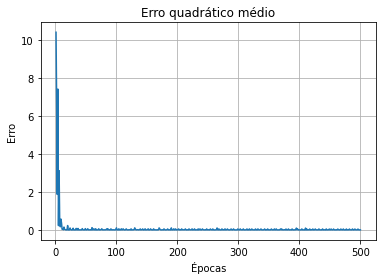

In [12]:
def train_network(network, n_splits, x_train, y_train, l_rate, n_repeats):
	rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats)
	avg_errors = np.array([])
	for train_idx, valid_idx in rkf.split(x_train):
		for idx in train_idx: # Treino
			outputs = forward_propagate(network, x_train[idx])
			expected = [y_train[idx]]
			backward_propagate_error(network, expected)
			update_weights(network, x_train[idx], l_rate)
		errors = np.array([])
		for idx in valid_idx: #Validação
			outputs = predict(network, x_train[idx])
			expected = y_train[idx]
			errors = np.append(errors, (expected-outputs)**2) # Erro quadrático
		avg_errors = np.append(avg_errors, np.mean(errors))
	
	return avg_errors

net = initialize_network(1, 5, 1)
print("Rede neural antes do treinamento:")
print_net(net)
print("\n")
avg_errors = train_network(net, 5, x_train, y_train, learning_rate, 100)
print("Rede neural depois do treinamento:")
print_net(net)
print("\n")
plt.figure()
plt.title("Erro quadrático médio")
plt.xlabel("Épocas")
plt.ylabel("Erro")
plt.grid()
plt.plot(np.arange(1, len(avg_errors)+1), avg_errors)
plt.show()

In [13]:
def test_network(network, x_test, y_test):
	errors = np.array([])
	for i, x in enumerate(x_test): #Validação
		outputs = predict(network, x)
		expected = y_test[i]
		errors = np.append(errors, (expected-outputs)**2) # Erro quadrático
	print("Erro médio: ", np.mean(errors))

test_network(net, x_test, y_test)

Erro médio:  0.0007787415310420785


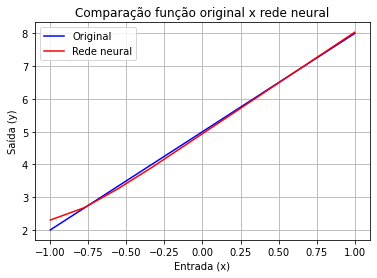

In [14]:
outputs = np.array([])
for value in x:
	outputs = np.append(outputs, predict(net, [value]))

plt.figure()
plt.title("Comparação função original x rede neural")
plt.xlabel("Entrada (x)")
plt.ylabel("Saída (y)")
plt.grid()
plt.plot(x, y, label="Original", color="blue")
plt.plot(x, outputs, label="Rede neural", color="red")
plt.legend()
plt.show()